# Introduction

Mexico is a country with an important growth in recent years, and this is reflected in the number of cars that circulate daily in the different cities of the Mexican Republic. More than 30 years ago, only those with high economic status were the ones who owned a car. However, due to globalization this has changed. Many vehicles brands have come to the country offering a variety of products within the automotive market. This has also represented that all families want to have their own vehicle to transport themselves, generating an exponential increase in the number of vehicles that circulate daily within Mexican streets and avenues. Having a car, is not only the comfort of transportation, it involves costs inherent to its maintenance and above all the responsibility that you have behind the wheel, since you can suffer accidents and the expenses that they can represent.

Until last year, in Mexico it was not mandatory to have auto insurance, most of the vehicle park did not have insurance to protect it against possible accidents. Mexico has hosted an annual average of 384,434 traffic accidents in urban areas during the last five years, according to records from the National Institute of Statistics and Geography (INEGI). Despite this high figure, only 27% of the national vehicle fleet is insured.
As of 2019, not having at least social responsibility insurance can represent a fine that ranges from 1,500 to 6,000 pesos in 25 states of the Republic, including Mexico City.

The most common accident in the country's cities is a collision with another motor vehicle, with 67%. The other main causes are collision with a fixed object, collision with a motorcycle and collision with a pedestrian. While the annual average of deaths in the last five years is 5,587.


# Problem

The concentration of car accidents in Mexico City and his relation with the main avenues of the city, due to the growth of the vehicle fleet.

# Data Source

To get a history of information, and how accidents in Mexico have changed in the last 10 years, National Institute of Statistics and Geography (INEGI by Spanish initials), provides historical information on car accidents in Mexico from its website. It is necessary to download the information and prepare the data to show the statistics by State.
The information by accident area will be used to show the accidents by state, and then we will show different zones of concentration in Mexico City. We will try ti relate this data to Foursquare data, to identify the closest places where accidents occurs.

The information also shows the days of the week and times when most accidents occurs, the types of accidents, whether they are injured or fatal.


In [1]:
import pandas as pd 

crash_mex = pd.read_csv("INEGI.csv") 
crash_mex.shape

(8272, 6)

In [2]:
crash_mex.head()

,Type,Code,Subcode,Zone,Year,Accidents
0,Fatal,01,NaN,Aguascalientes,2008,68.0
1,No fatal,01,NaN,Aguascalientes,2008,1750.0
2,No event,01,NaN,Aguascalientes,2008,NaN
3,Solo daños,01,NaN,Aguascalientes,2008,3850.0
4,Total,01,NaN,Aguascalientes,2008,5668.0


For example the next graphic shows the Total accidents reported in Mexico City in the last 10 years:

In [3]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

df = crash_mex.copy()
cdmx_aux = df[df['Code'] == "09"]
cdmx = cdmx_aux[cdmx_aux['Type'] == "Total"]
df_tot = cdmx.drop(['Type', 'Code', 'Subcode'], axis=1)
df_tot


Matplotlib version:  3.1.1


,Zone,Year,Accidents
41,Ciudad de México,2008,14438.0
793,Ciudad de México,2009,13398.0
1545,Ciudad de México,2010,14729.0
2297,Ciudad de México,2011,16466.0
3049,Ciudad de México,2012,17120.0
3801,Ciudad de México,2013,15742.0
4553,Ciudad de México,2014,14319.0
5305,Ciudad de México,2015,12337.0
6057,Ciudad de México,2016,11449.0
6809,Ciudad de México,2017,12321.0


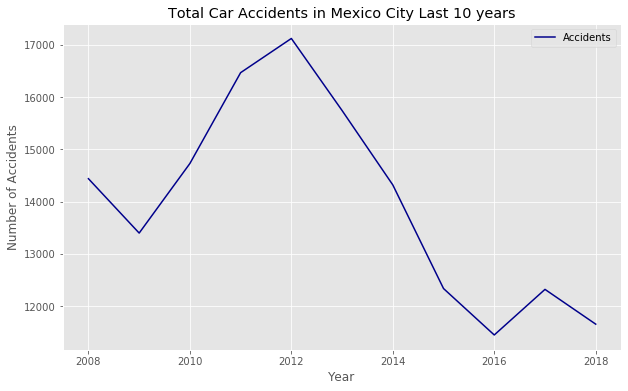

In [4]:
df_tot.plot(kind='line', x='Year', y='Accidents', figsize=(10, 6), color='darkblue')

plt.title('Total Car Accidents in Mexico City Last 10 years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

plt.show()

For the relation for all the Zones in Mexico City with Foursquare, we need the Latitude and Longitude of this zones. In the next Table we can get the information:


In [5]:
pos_mex = pd.read_csv("Coordenadas.csv") 
pos_mex.head()

,Code,Subcode,Ciudad,Longitud,Latitud
0,NaN,09 010,Álvaro Obregón,19.36096,-99.25439
1,NaN,09 002,Azcapotzalco,19.47350,-99.15621
2,NaN,09 014,Benito Juárez,19.39504,-99.18701
3,NaN,09 003,Coyoacán,19.34251,-99.12559
4,NaN,09 004,Cuajimalpa de Morelos,19.33230,-99.32529


# Metodology

For the beginning we are going to start with the history of the accidents in Mexico.

In [58]:
df = crash_mex.copy()
all_map = df[df['Code'].str[:3] != "09 "]
all_map = all_map[all_map['Code'].str[:3] != "15 "]
all_map = all_map[all_map['Type'] == "Total"] 
all_map = all_map[all_map['Year'] == 2018]
all_map = all_map.drop(['Type', 'Code', 'Year', 'Subcode'], axis=1)
all_map = all_map.sort_values(by='Accidents', ascending = False)
all_map = all_map.set_index('Zone')
all_map.head()

,Accidents
Zone,
Nuevo León,80863.0
Chihuahua,25938.0
Jalisco,25067.0
Guanajuato,19290.0
Baja California,16300.0


Then we going to continue with the analisis of accidents in Mexico City.

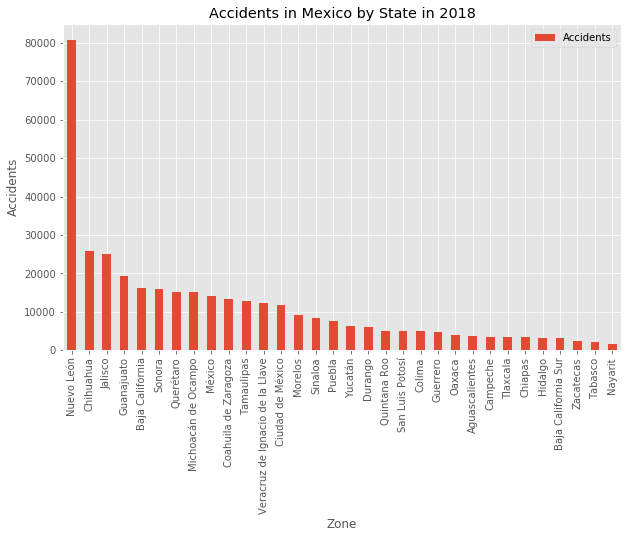

In [60]:
all_map.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Zone') # add to x-label to the plot
plt.ylabel('Accidents') # add y-label to the plot
plt.title('Accidents in Mexico by State in 2018') # add title to the plot

plt.show()

During 2018 the concentration of crashes is in the center of the city. In th next table you could see, that accidents are concentrated in Cuauhtemoc, Gustavo A. Madero, Iztapalapa, Miguel Hidalgo and Benito Juarez.

In [7]:
df = crash_mex.copy()
cdmx_aux = df[df['Code'].str[:2] == "09"]
cdmx_aux = cdmx_aux[cdmx_aux['Type'] == "Total"] 
cdmx_aux = cdmx_aux[cdmx_aux['Subcode'] >= 0]
cdmx_aux2 = cdmx_aux[cdmx_aux['Year'] == 2018]
cdmx = cdmx_aux2.sort_values(by='Accidents', ascending = False)
cdmx

,Type,Code,Subcode,Zone,Year,Accidents
7731,Total,09 015,15.0,Cuauhtémoc,2018,1590.0
7691,Total,09 005,5.0,Gustavo A. Madero,2018,1505.0
7699,Total,09 007,7.0,Iztapalapa,2018,1295.0
7735,Total,09 016,16.0,Miguel Hidalgo,2018,998.0
7727,Total,09 014,14.0,Benito Juárez,2018,934.0
7711,Total,09 010,10.0,Álvaro Obregón,2018,933.0
7683,Total,09 003,3.0,Coyoacán,2018,929.0
7739,Total,09 017,17.0,Venustiano Carranza,2018,815.0
7719,Total,09 012,12.0,Tlalpan,2018,783.0
7695,Total,09 006,6.0,Iztacalco,2018,462.0


In [42]:
l_top = ["Cuauhtémoc","Gustavo A. Madero","Iztapalapa","Miguel Hidalgo","Benito Juárez","Álvaro Obregón"]
values = cdmx_aux.Zone.isin(l_top)
top = cdmx_aux[values]
top = top.drop(['Type', 'Code', 'Subcode'], axis=1)
top = top.sort_values(by=['Zone', 'Year'])

d1 = top[top['Zone']== "Benito Juárez"]
d1 = d1.rename(columns = {'Accidents':'Benito_Juarez'})
d1 = d1.reset_index()
d1 = d1.drop(['index','Zone'], axis=1)
d1.head()

d2 = top[top['Zone']== "Gustavo A. Madero"]
d2 = d2.rename(columns = {'Accidents':'Gustavo_Madero'})
d2 = d2.reset_index()
d2 = d2.drop(['index','Zone'], axis=1)

d3 = top[top['Zone']== "Iztapalapa"]
d3 = d3.rename(columns = {'Accidents':'Iztapalapa'})
d3 = d3.reset_index()
d3 = d3.drop(['index','Zone'], axis=1)

d4 = top[top['Zone']== "Miguel Hidalgo"]
d4 = d4.rename(columns = {'Accidents':'Miguel_Hidalgo'})
d4 = d4.reset_index()
d4 = d4.drop(['index','Zone'], axis=1)

d5 = top[top['Zone']== "Cuauhtémoc"]
d5 = d5.rename(columns = {'Accidents':'Cuauhtemoc'})
d5 = d5.reset_index()
d5 = d5.drop(['index','Zone'], axis=1)

d1 = pd.merge(d1,d2,on='Year')
d1 = pd.merge(d1,d3,on='Year')
d1 = pd.merge(d1,d4,on='Year')
dfinal = pd.merge(d1,d5,on='Year')
dfinal = dfinal.set_index('Year')
dfinal


,Benito_Juarez,Gustavo_Madero,Iztapalapa,Miguel_Hidalgo,Cuauhtemoc
Year,,,,,
2008,1336.0,1598.0,1876.0,1114.0,2149.0
2009,1081.0,1649.0,1797.0,1138.0,1618.0
2010,1433.0,1883.0,1952.0,1227.0,1701.0
2011,1508.0,2177.0,1999.0,1469.0,1669.0
2012,1422.0,2022.0,2037.0,1568.0,2283.0
2013,1291.0,1852.0,2206.0,1496.0,2025.0
2014,1133.0,1647.0,2113.0,1281.0,1820.0
2015,934.0,1592.0,1659.0,1228.0,1652.0
2016,847.0,1478.0,1583.0,978.0,1740.0


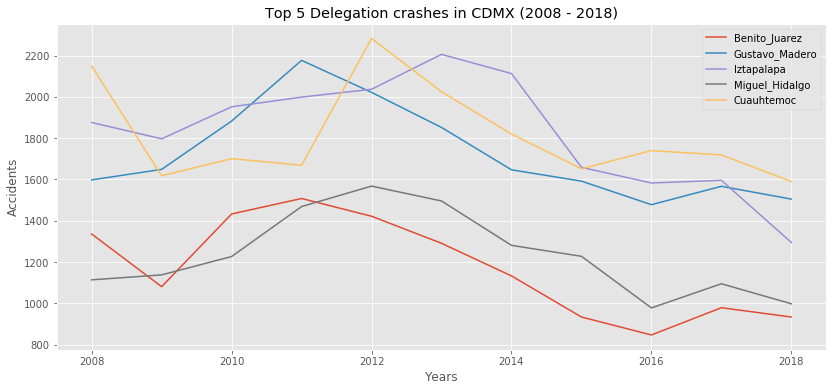

In [45]:
fig = plt.figure() # create figure

ax1 = fig.add_subplot(1, 5, 1) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

dfinal.plot(kind='line', figsize=(60, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Top 5 Delegation crashes in CDMX (2008 - 2018)')
ax1.set_ylabel('Accidents')
ax1.set_xlabel('Years')

plt.show()

Solving environment: done

# All requested packages already installed.

Folium installed and imported!
GeoJSON file downloaded!


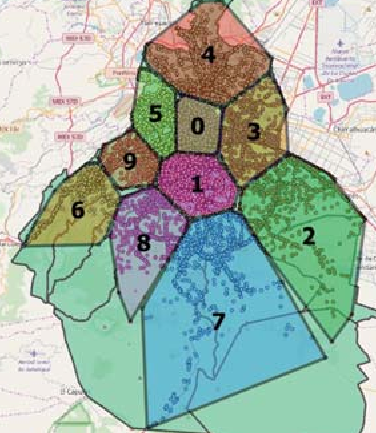

In [67]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')
world_geo = r'world_countries.json' # geojson file
accidents

# Results

It is important to detail the accident rate city by city, since, when seeing the graph in this way, we realize the way of driving in each state. Surprisingly, Mexico City is in eighth place, while Nuevo León, Jalisco and Chihuahua obtain the first three steps. Similarly, Nuevo León shoots up considerably in first place, making it the most rugged location in the country.

In Mexico City the firs place is to Cuauhtemoc delegation and the second place is for Gustavo A. Madero, both in the center of the city; the next postion is to Iztapalapa, the only place outside the city center in this top. But is not surprising due to the number of cars that circulate daily in the area. Finally the last 3 positions are for Miguel Hidalgo and Benito Juarez, near to the center of the city too.

# Conclusion

The conclusion, surprising as it may seem, is that in the Mexican Republic we have a strong influence from our northern neighbors (the United States), which due to this has accumulated a large number of chocolate cars (cars of more than 10 years that are bought in the US and are brought to Mexico at a lower price); Nuevo Leon is very close to the border and is one of the states with the largest economic capital, so the number of cars is very high and accidents are too.

In the case of the center, it is very easy to see that accidents occur in the center of Mexico City, where the greatest activity of companies in Mexico is concentrated. In the case of Iztapalapa, it is an area with a significant concentration of people, which apparently makes it enter the top without major complications. In summary, the volume of people is what makes the main reason for accidents in Mexico.